## Packages

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

## Open Data 

In [2]:
data_day_milan_noir_bondree_milan_royal = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_day_milan_noir_bondree_milan_royal.csv')

In [3]:
data_day_milan_noir_bondree_milan_royal.head()

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature,n_observers,abundance_dir_1_per_observer,abundance_dir_2_per_observer,abundance_local_per_observer
0,2016-07-15,2016,7,15,08:24:00,18:48:00,10.400000,"margaux ruiz, lauriane de gail, Gabriel sauvé,...",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,7,61.857143,0.0,0.142857
1,2016-07-16,2016,7,16,08:24:00,17:00:00,8.600000,"MR, QD",2.0,NaN,...,0.0,NaN,NaN,NaN,1000.0,13.0,2,188.000000,0.0,0.000000
2,2016-07-17,2016,7,17,06:23:00,16:13:00,9.833333,"MR, MC, CR, CB, QD",2.0,NaN,...,0.0,NaN,NaN,NaN,10000.0,15.0,5,17.600000,0.0,0.000000
3,2016-07-18,2016,7,18,06:49:00,16:39:00,9.833333,"MR, LDG, MC, Mijo Gariou",4.0,NaN,...,1.0,NaN,NaN,NaN,10000.0,21.0,4,47.000000,0.0,0.000000
4,2016-07-19,2016,7,19,06:36:00,16:47:00,10.183333,"MR, QD, LDG, GS",4.0,NaN,...,2.0,NaN,NaN,NaN,12000.0,34.0,4,42.500000,0.0,0.000000


In [4]:
data_day_milan_noir_bondree_milan_royal.species.unique()

array(['Milan noir', 'Bondrée apivore', 'Milan royal'], dtype=object)

## Nombre d'oiseaux comptés (Milan noir, Milan royal, Bondrée apivore) par jour en fonction du nombre d'observateurs

In [5]:
abundance_per_species_and_year = data_day_milan_noir_bondree_milan_royal.groupby(['species', 'year'])['direction1'].sum().reset_index()
abundance_per_species_and_year.head(2)

,species,year,direction1
0,Bondrée apivore,2016,4517.0
1,Bondrée apivore,2017,4907.0


<AxesSubplot:xlabel='year', ylabel='n_observers'>

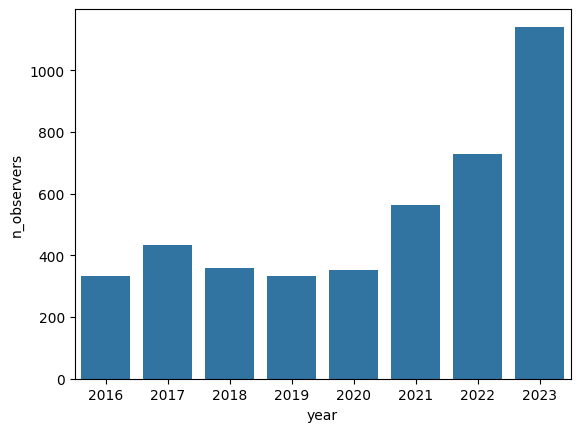

In [6]:
date_observers = data_day_milan_noir_bondree_milan_royal[['date_dt', 'year', 'n_observers']].drop_duplicates()
n_observers_per_year = date_observers.groupby(['year'])['n_observers'].sum().reset_index()
sns.barplot(data=n_observers_per_year, x='year', y='n_observers')

In [7]:
def classify_observers(n):
    if n == 1:
        return '1'
    elif n == 2:
        return '2'
    elif 3 <= n <= 5:
        return '3-5'
    elif 4 <= n <= 10:
        return '4-10'
    else:
        return '>10'

In [8]:
# Apply the classification function
data_day_milan_noir_bondree_milan_royal['observer_class'] = data_day_milan_noir_bondree_milan_royal['n_observers'].apply(classify_observers)

In [11]:
#date_observers_class = data_day_milan_noir_bondree_milan_royal[['date_dt', 'year', 'observer_class', 'direction1']].drop_duplicates()
n_observers_per_year = data_day_milan_noir_bondree_milan_royal.groupby(['year', 'observer_class'])['direction1'].sum().reset_index()

In [12]:
n_observers_per_year.sort_values(by='direction1', ascending=False).head()

,year,observer_class,direction1
35,2023,>10,71870.0
16,2019,4-10,50173.0
7,2017,4-10,43808.0
24,2021,4-10,42982.0
19,2020,4-10,42727.0


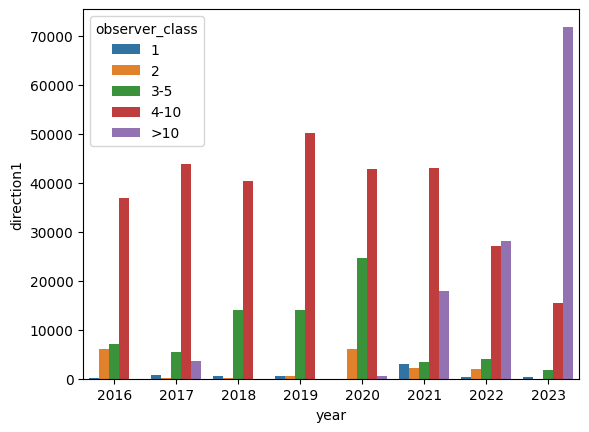

In [13]:
sns.barplot(data=n_observers_per_year, x='year', y='direction1', hue='observer_class').label=()

In [17]:
data = data_day_milan_noir_bondree_milan_royal
data.head()

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,cloudheight,precipitation,perc_duration,visibility,temperature,n_observers,abundance_dir_1_per_observer,abundance_dir_2_per_observer,abundance_local_per_observer,observer_class
0,2016-07-15,2016,7,15,08:24:00,18:48:00,10.400000,"margaux ruiz, lauriane de gail, Gabriel sauvé,...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7,61.857143,0.0,0.142857,4-10
1,2016-07-16,2016,7,16,08:24:00,17:00:00,8.600000,"MR, QD",2.0,NaN,...,NaN,NaN,NaN,1000.0,13.0,2,188.000000,0.0,0.000000,2
2,2016-07-17,2016,7,17,06:23:00,16:13:00,9.833333,"MR, MC, CR, CB, QD",2.0,NaN,...,NaN,NaN,NaN,10000.0,15.0,5,17.600000,0.0,0.000000,3-5
3,2016-07-18,2016,7,18,06:49:00,16:39:00,9.833333,"MR, LDG, MC, Mijo Gariou",4.0,NaN,...,NaN,NaN,NaN,10000.0,21.0,4,47.000000,0.0,0.000000,3-5
4,2016-07-19,2016,7,19,06:36:00,16:47:00,10.183333,"MR, QD, LDG, GS",4.0,NaN,...,NaN,NaN,NaN,12000.0,34.0,4,42.500000,0.0,0.000000,3-5


In [20]:
data = data_day_milan_noir_bondree_milan_royal

# from raw value to percentage
total = data.groupby('year')['direction1'].sum().reset_index()
total.columns = ['year', 'total']

n_observers_freq = n_observers_per_year.merge(total,how='left', on='year')
n_observers_freq['mean_class'] = n_observers_freq['direction1']/n_observers_freq['total']*100
n_observers_freq['freq_class'] = n_observers_freq['direction1']/n_observers_freq['total']*100
n_observers_freq.head()

,year,observer_class,direction1,total,mean_class,freq_class
0,2016,1,119.0,50251.0,0.236811,0.236811
1,2016,2,6059.0,50251.0,12.057471,12.057471
2,2016,3-5,7106.0,50251.0,14.141012,14.141012
3,2016,4-10,36967.0,50251.0,73.564705,73.564705
4,2017,1,699.0,53836.0,1.298388,1.298388


<AxesSubplot:xlabel='year', ylabel='freq_class'>

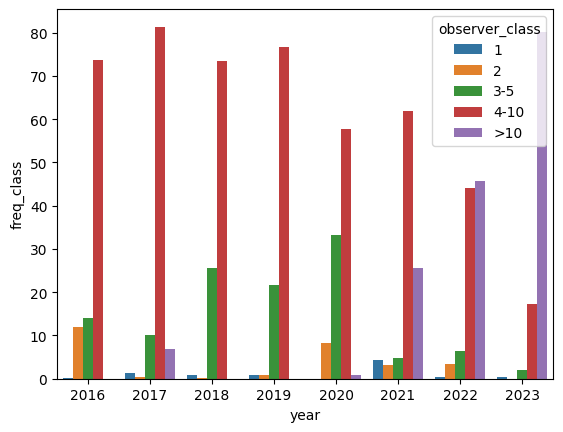

In [21]:
# Stacked barplot
sns.barplot(data=n_observers_freq, x='year', y='freq_class', hue='observer_class')

/Users/amelietatin/.pyenv/versions/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


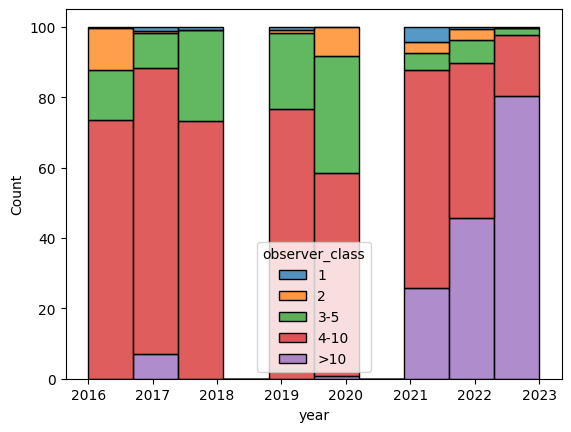

In [22]:
sns.histplot(data=n_observers_freq,
             x='year',
             weights='freq_class',
             hue='observer_class',
             multiple='stack');

## Milan noir

In [23]:
milan_noir = data_day_milan_noir_bondree_milan_royal[data_day_milan_noir_bondree_milan_royal['species'].isin(['Milan noir'])]

In [24]:
milan_noir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 1193
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date_dt                       533 non-null    object 
 1   year                          533 non-null    int64  
 2   month                         533 non-null    int64  
 3   day                           533 non-null    int64  
 4   start_time                    533 non-null    object 
 5   stop_time                     533 non-null    object 
 6   day_duration                  533 non-null    float64
 7   observers                     533 non-null    object 
 8   observersactive               388 non-null    float64
 9   observerspresent              362 non-null    float64
 10  species                       533 non-null    object 
 11  direction1                    533 non-null    float64
 12  direction2                    533 non-null    float64
 13  maxl

<AxesSubplot:xlabel='direction1', ylabel='Count'>

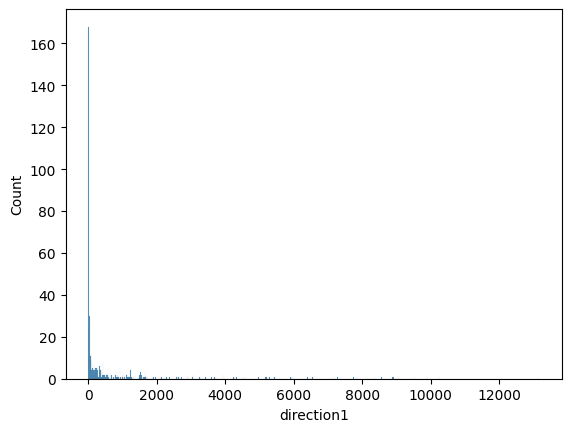

In [25]:
sns.histplot(milan_noir.direction1, bins=1000)

In [27]:
# moyenne de chaque classe par saison (combien de jours on a)
# au lieu des chiffres totaux : moyenne
# par années
# moyenne du nombre d'oiseaux observés par class par an
mean_individuals_per_observer_per_year= milan_noir.groupby(['year', 'observer_class'])['direction1'].mean().reset_index()
median_individuals_per_observer_per_year= milan_noir.groupby(['year', 'observer_class'])['direction1'].median().reset_index()
mean_individuals_per_observer_per_year.merge(median_individuals_per_observer_per_year)
mean_median = mean_individuals_per_observer_per_year.merge(median_individuals_per_observer_per_year,how='left', on=['year', 'observer_class'])
mean_median.columns = ['year', 'observer_class', 'mean', 'median']
mean_median.head()

,year,observer_class,mean,median
0,2016,1,1.000000,1.0
1,2016,2,943.833333,623.5
2,2016,3-5,359.777778,50.5
3,2016,4-10,1061.741935,181.0
4,2017,1,210.500000,210.5


<Figure size 2000x1500 with 0 Axes>

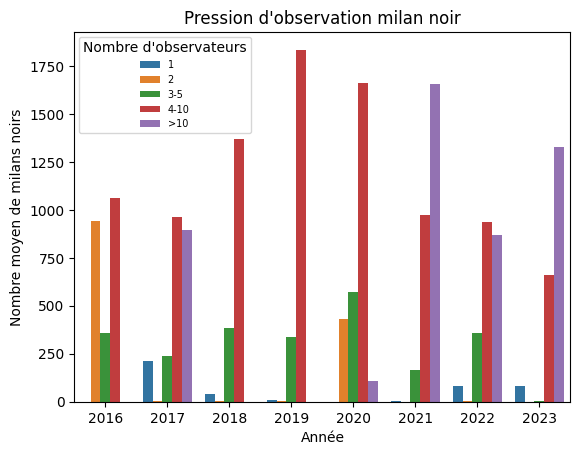

In [35]:
plt.figure(figsize=(20,15))

fig, ax = plt.subplots()

sns.barplot(data=mean_individuals_per_observer_per_year,
            x='year',
            y='direction1',
            hue='observer_class').set(xlabel ="Année", ylabel = "Nombre moyen de milans noirs");

plt.title("Pression d'observation milan noir", fontsize=12);
plt.legend(title="Nombre d'observateurs", prop={'size': 7})

plt.savefig('../figures/pression_observation/milan_noir_pression_obs_moyenne.png')

<Figure size 2000x1500 with 0 Axes>

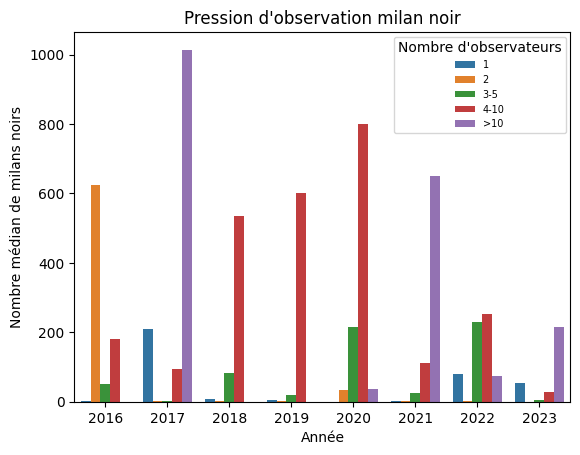

In [36]:
plt.figure(figsize=(20,15))

fig, ax = plt.subplots()

sns.barplot(data=median_individuals_per_observer_per_year,
            x='year',
            y='direction1',
            hue='observer_class').set(xlabel ="Année", ylabel = "Nombre médian de milans noirs");

plt.title("Pression d'observation milan noir", fontsize=12);
plt.legend(title="Nombre d'observateurs", prop={'size': 7})

plt.savefig('../figures/pression_observation/milan_noir_pression_obs_median.png')

## Bondrée apivore

In [39]:
bondree = data_day_milan_noir_bondree_milan_royal[data_day_milan_noir_bondree_milan_royal['species'].isin(['Bondrée apivore'])]

# moyenne de chaque classe par saison (combien de jours on a)
# au lieu des chiffres totaux : moyenne
# par années
# moyenne du nombre d'oiseaux observés par class par an
mean_individuals_per_observer_per_year= bondree.groupby(['year', 'observer_class'])['direction1'].mean().reset_index()
median_individuals_per_observer_per_year= bondree.groupby(['year', 'observer_class'])['direction1'].median().reset_index()
mean_individuals_per_observer_per_year.merge(median_individuals_per_observer_per_year)
mean_median = mean_individuals_per_observer_per_year.merge(median_individuals_per_observer_per_year,how='left', on=['year', 'observer_class'])
mean_median.columns = ['year', 'observer_class', 'mean', 'median']
mean_median.head()

,year,observer_class,mean,median
0,2016,1,2.000000,2.0
1,2016,2,1.250000,1.0
2,2016,3-5,36.230769,4.0
3,2016,4-10,134.633333,27.5
4,2017,2,1.000000,1.0


<Figure size 2000x1500 with 0 Axes>

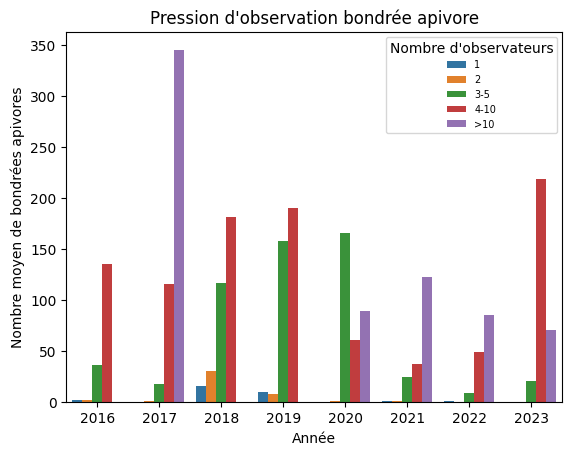

In [40]:
plt.figure(figsize=(20,15))

fig, ax = plt.subplots()

sns.barplot(data=mean_individuals_per_observer_per_year,
            x='year',
            y='direction1',
            hue='observer_class').set(xlabel ="Année", ylabel = "Nombre moyen de bondrées apivores");

plt.title("Pression d'observation bondrée apivore", fontsize=12);
plt.legend(title="Nombre d'observateurs", prop={'size': 7})

plt.savefig('../figures/pression_observation/bondree_apivore_pression_obs_moyenne.png')

<Figure size 2000x1500 with 0 Axes>

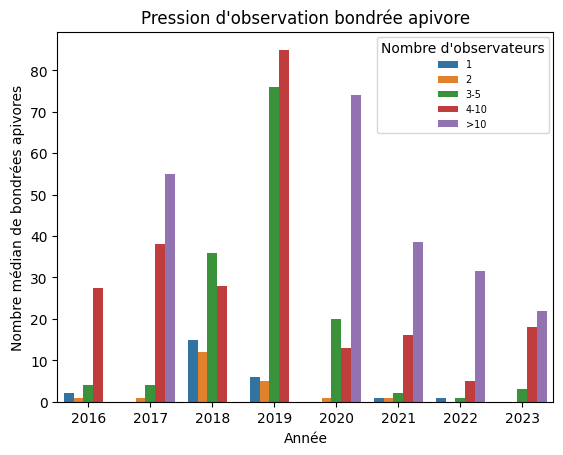

In [41]:
plt.figure(figsize=(20,15))

fig, ax = plt.subplots()

sns.barplot(data=median_individuals_per_observer_per_year,
            x='year',
            y='direction1',
            hue='observer_class').set(xlabel ="Année", ylabel = "Nombre médian de bondrées apivores");

plt.title("Pression d'observation bondrée apivore", fontsize=12);
plt.legend(title="Nombre d'observateurs", prop={'size': 7})

plt.savefig('../figures/pression_observation/bondree_apivore_pression_obs_median.png')

## Milan Royal

In [44]:
milan_royal = data_day_milan_noir_bondree_milan_royal[data_day_milan_noir_bondree_milan_royal['species'].isin(['Milan royal'])]

# moyenne de chaque classe par saison (combien de jours on a)
# au lieu des chiffres totaux : moyenne
# par années
# moyenne du nombre d'oiseaux observés par class par an
mean_individuals_per_observer_per_year= milan_royal.groupby(['year', 'observer_class'])['direction1'].mean().reset_index()
median_individuals_per_observer_per_year= milan_royal.groupby(['year', 'observer_class'])['direction1'].median().reset_index()
mean_individuals_per_observer_per_year.merge(median_individuals_per_observer_per_year)
mean_median = mean_individuals_per_observer_per_year.merge(median_individuals_per_observer_per_year,how='left', on=['year', 'observer_class'])
mean_median.columns = ['year', 'observer_class', 'mean', 'median']
mean_median.head()

,year,observer_class,mean,median
0,2016,1,116.000000,116.0
1,2016,2,195.500000,195.5
2,2016,3-5,31.800000,5.0
3,2016,4-10,1.555556,1.0
4,2017,1,139.000000,139.0


<Figure size 2000x1500 with 0 Axes>

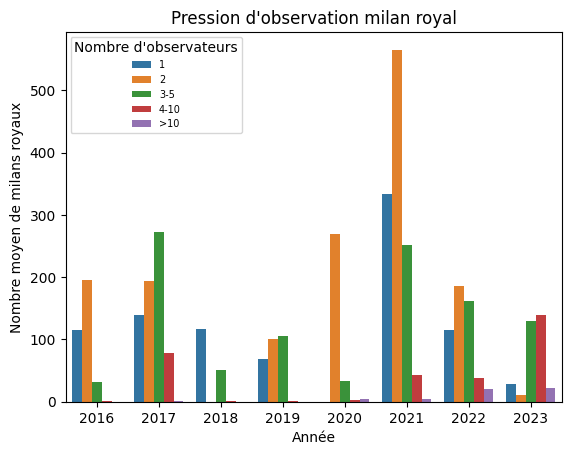

In [45]:
plt.figure(figsize=(20,15))

fig, ax = plt.subplots()

sns.barplot(data=mean_individuals_per_observer_per_year,
            x='year',
            y='direction1',
            hue='observer_class').set(xlabel ="Année", ylabel = "Nombre moyen de milans royaux");

plt.title("Pression d'observation milan royal", fontsize=12);
plt.legend(title="Nombre d'observateurs", prop={'size': 7})

plt.savefig('../figures/pression_observation/milan_royal_pression_obs_moyenne.png')

<Figure size 2000x1500 with 0 Axes>

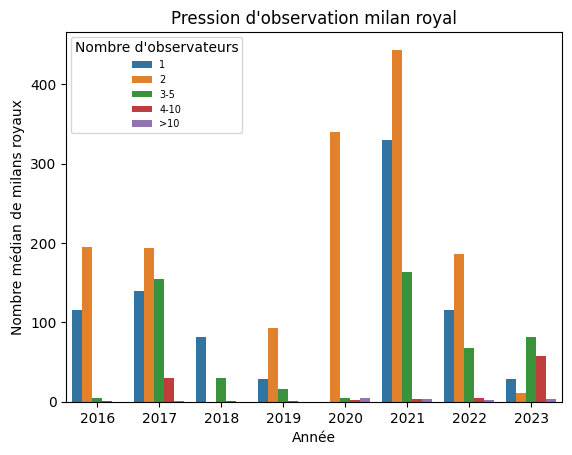

In [46]:
plt.figure(figsize=(20,15))

fig, ax = plt.subplots()

sns.barplot(data=median_individuals_per_observer_per_year,
            x='year',
            y='direction1',
            hue='observer_class').set(xlabel ="Année", ylabel = "Nombre médian de milans royaux");

plt.title("Pression d'observation milan royal", fontsize=12);
plt.legend(title="Nombre d'observateurs", prop={'size': 7})

plt.savefig('../figures/pression_observation/milan_royal_pression_obs_median.png')